<a href="https://colab.research.google.com/github/soapycat99/cs_4410/blob/main/KNN_with_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2


In [6]:
 train.price_range = train.price_range.astype('category')

In [7]:
X = train.drop(['price_range'], axis=1)

In [8]:
y = train['price_range']

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0, test_size=0.2)

In [12]:
X_train.shape

(1600, 20)

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
y_pred = knn.predict(X_test)

In [17]:
metrics.accuracy_score(y_test, y_pred)

0.9275

In [18]:
#cross validation
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

In [21]:
print(scores.mean())

0.9235000000000001


In [22]:
k_range = range(1,41)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
  k_scores.append(scores.mean())

In [23]:
k_scores

[0.908,
 0.8950000000000001,
 0.9195,
 0.9094999999999999,
 0.9195,
 0.9205,
 0.925,
 0.9245000000000001,
 0.931,
 0.9315,
 0.9345000000000001,
 0.93,
 0.9339999999999999,
 0.929,
 0.9299999999999999,
 0.9279999999999999,
 0.9315,
 0.9305,
 0.932,
 0.93,
 0.9295000000000002,
 0.9295000000000002,
 0.9325000000000001,
 0.9280000000000002,
 0.931,
 0.9339999999999999,
 0.933,
 0.9324999999999999,
 0.9305,
 0.9295,
 0.932,
 0.9285,
 0.9280000000000002,
 0.9275,
 0.9289999999999999,
 0.9239999999999998,
 0.9245000000000001,
 0.9244999999999999,
 0.9260000000000002,
 0.9264999999999999]

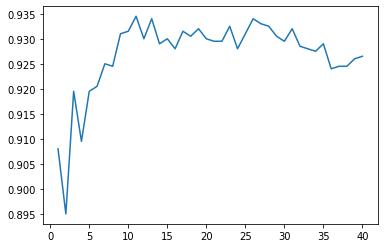

In [24]:
sn.lineplot( x=k_range, y=k_scores)